In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look prettier
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Preview
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


C:\Users\Anuragdhar\AppData\Local\Temp\ipykernel_5812\2140725479.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


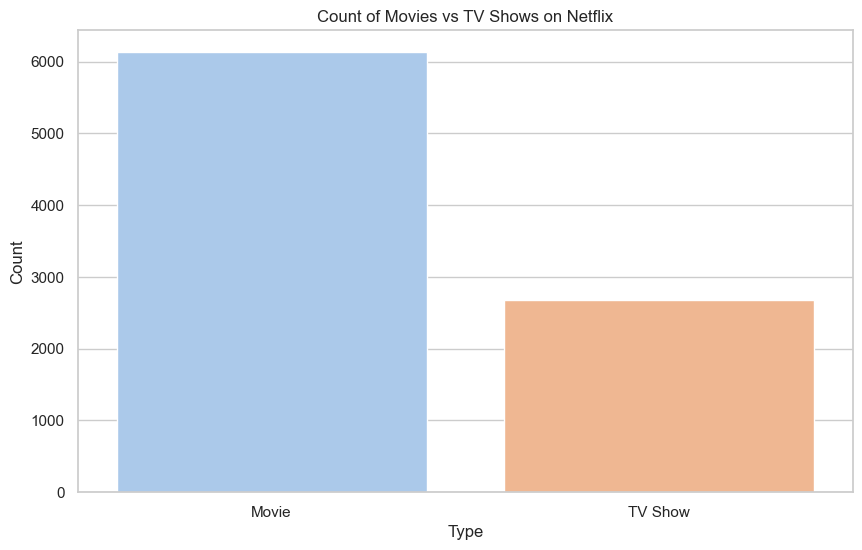

In [3]:
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


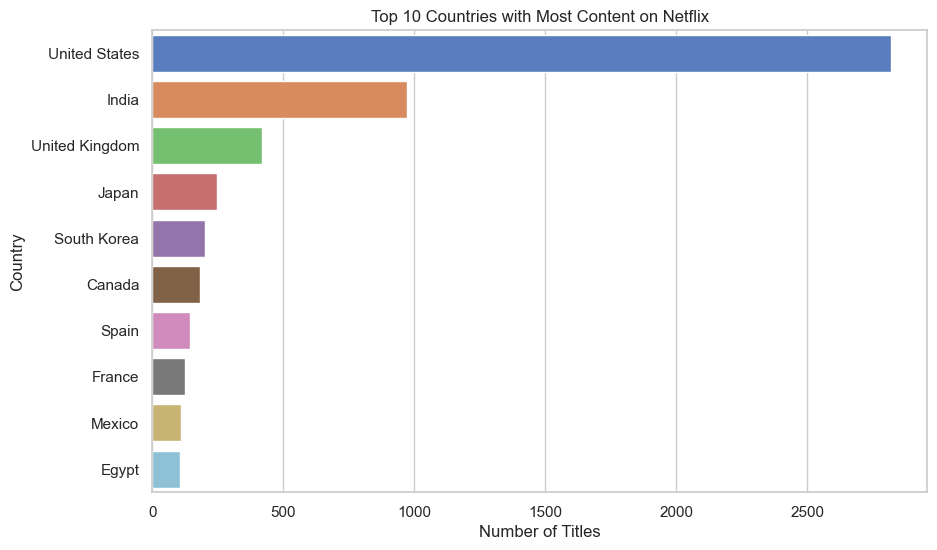

In [5]:
top_countries = df['country'].value_counts().head(10)

# Create a DataFrame for plotting with 'country' and 'count' columns
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['country', 'count']

# Plot using seaborn with 'hue' to avoid the warning
sns.barplot(data=top_countries_df, x='count', y='country', hue='country', dodge=False, palette='muted', legend=False)
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


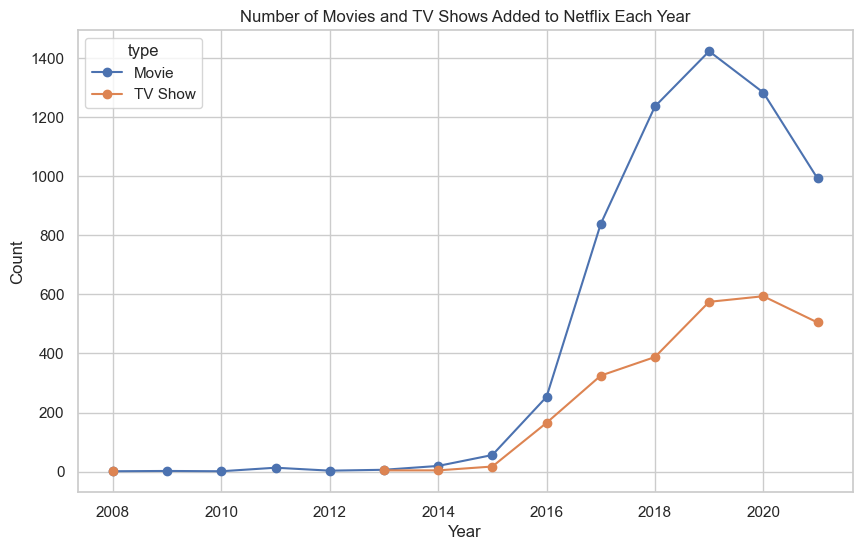

In [6]:
# Convert 'date_added' to datetime (again, with error handling)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year
df['year_added'] = df['date_added'].dt.year

# Group and count by year and type
content_by_year = df.groupby(['year_added', 'type']).size().unstack()

# Plot the trend
content_by_year.plot(kind='line', marker='o')
plt.title('Number of Movies and TV Shows Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


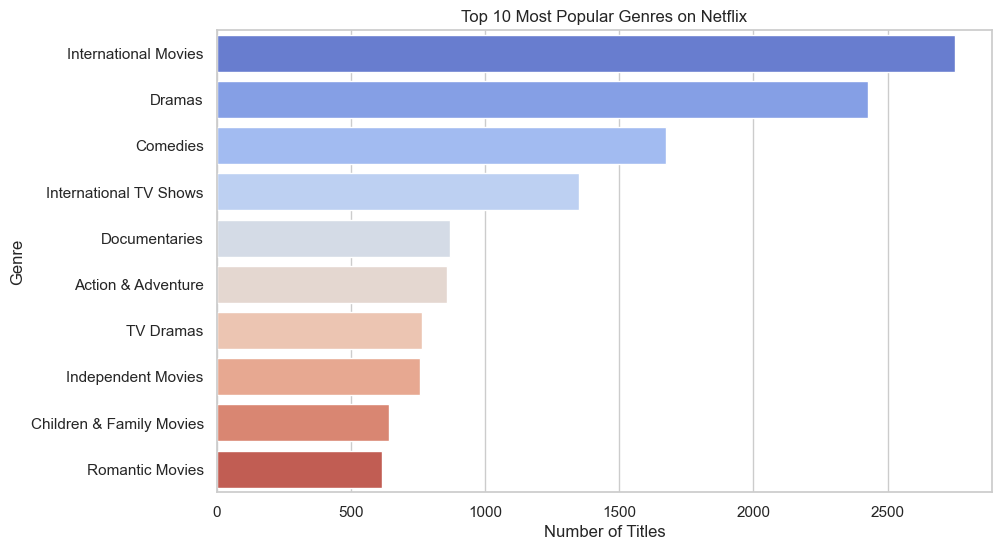

In [8]:
# Split and clean the genres
genre_series = df['listed_in'].dropna().str.split(',').explode().str.strip()

# Top 10 genres
top_genres_df = genre_series.value_counts().head(10).reset_index()
top_genres_df.columns = ['Genre', 'Count']

# Plot with hue assigned
sns.barplot(data=top_genres_df, x='Count', y='Genre', hue='Genre', palette='coolwarm', dodge=False, legend=False)
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


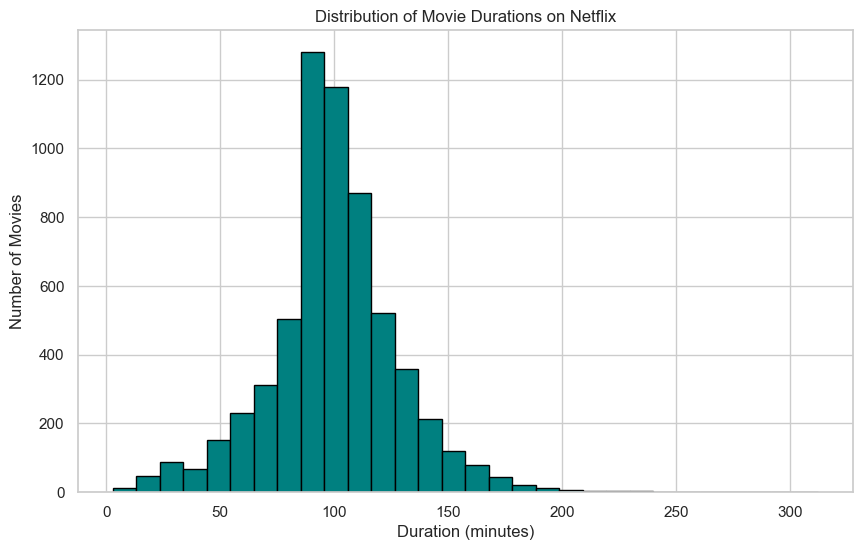

In [10]:
# Filter only movies
movies = df[df['type'] == 'Movie'].copy()

# Extract numeric value from 'duration' column using raw string to avoid warning
movies['duration_minutes'] = movies['duration'].str.extract(r'(\d+)').astype(float)

# Plot histogram
plt.hist(movies['duration_minutes'].dropna(), bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()
